## Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Loading Dataset

In [2]:
wine = pd.read_csv('C:\\Users\\nigbu\\Desktop\\winequality-white.csv',sep=';')

## Printing Top 5 Data

In [3]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Printing Info

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

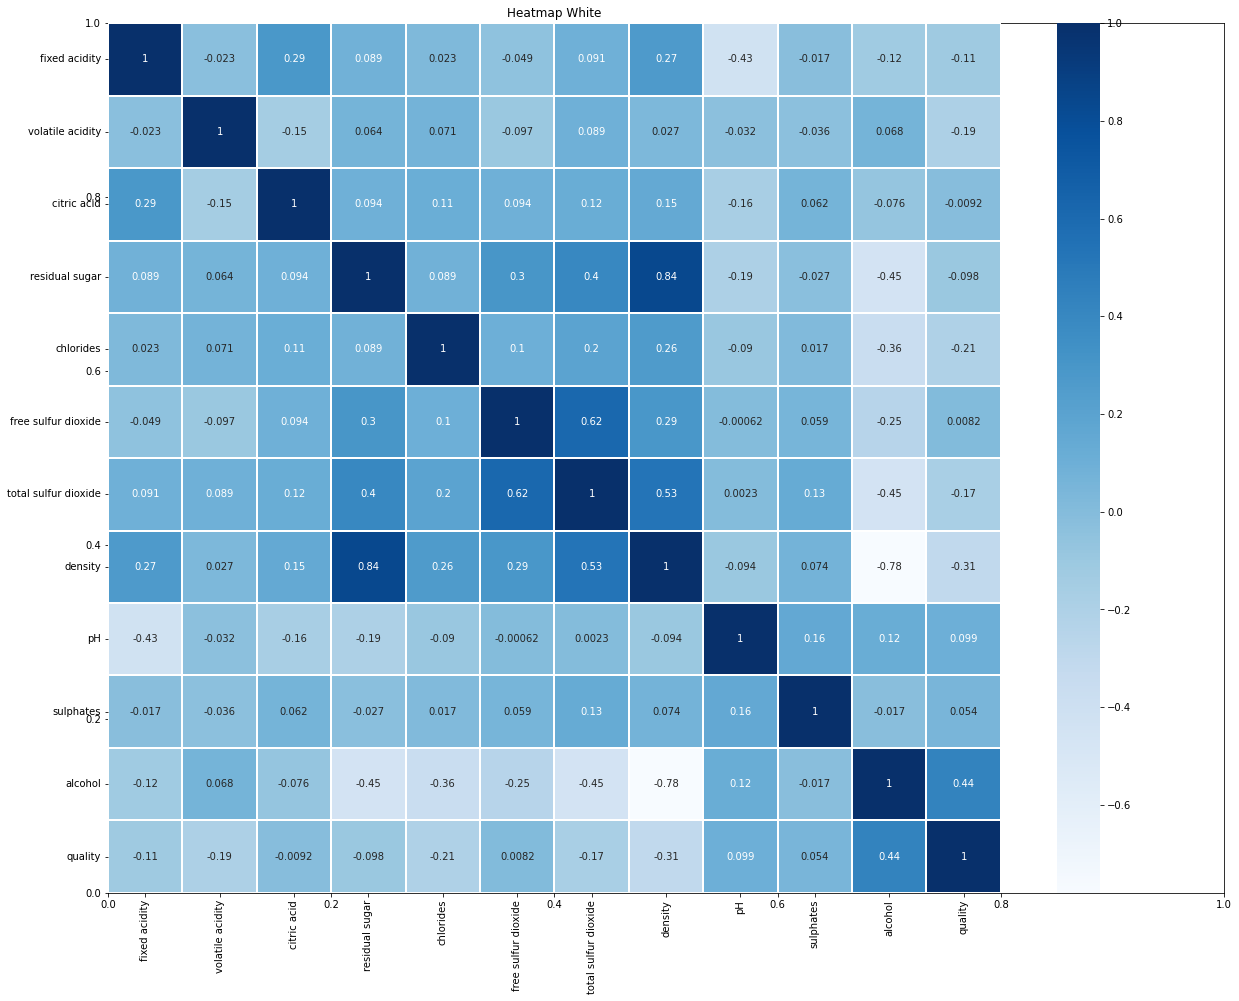

In [6]:
plt.subplots(figsize=(20,16))
ax = plt.axes()
ax.set_title("Heatmap White")
corr = wine.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Blues",
           annot=True,
           linecolor="White",
           linewidths=2.0)
plt.show()

## Count Null Values

In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Preprocessing Data

In [8]:
wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [9]:
bins=[2,5,6.5,9] #3 4 5 low, 6 med, 7 8 9 high - i chose 6 as med because it was the median number in quality
group_names=['low','med','high']
wine['quality']=pd.cut(wine['quality'],bins=bins, labels=group_names)

In [10]:
wine['quality'].value_counts()

med     2198
low     1640
high    1060
Name: quality, dtype: int64

In [11]:
le = LabelEncoder()

### Classifying the Qualities Based on Their Quality as Bad or Good

In [12]:
wine['quality']=le.fit_transform(wine['quality'])

In [13]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


In [14]:
#2 low 1 med high 0
wine['quality'].value_counts()

2    2198
1    1640
0    1060
Name: quality, dtype: int64

## Plotting the Count/Quality Graph

C:\Users\nigbu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

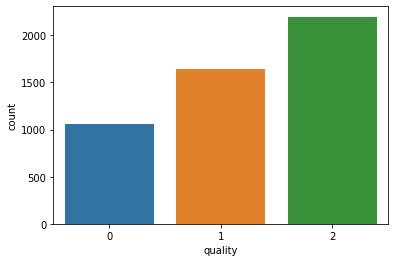

In [15]:
sns.countplot(wine['quality'])

## Seperate the Dataset as Response Variable and Feature Variables

In [16]:
X = wine.drop('quality',axis=1)
y = wine['quality']

## Train and Test Splitting of Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Applying Standard Scaling to Get Optimized Results

In [18]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest Classifier

In [19]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [20]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print("\nAccuracy Score: ",accuracy_score(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       227
           1       0.77      0.74      0.76       321
           2       0.70      0.78      0.74       432

    accuracy                           0.75       980
   macro avg       0.77      0.74      0.75       980
weighted avg       0.75      0.75      0.75       980

[[155   4  68]
 [  3 239  79]
 [ 28  66 338]]

Accuracy Score:  0.746938775510204


## SVM Classifier

In [21]:
clf = svm.SVC(kernel='poly',coef0=5.0,max_iter=-1)
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [22]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))
print("\nAccuracy Score: %.2f " % accuracy_score(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.65      0.43      0.52       227
           1       0.66      0.60      0.63       321
           2       0.54      0.68      0.60       432

    accuracy                           0.59       980
   macro avg       0.62      0.57      0.58       980
weighted avg       0.61      0.59      0.59       980

[[ 98   5 124]
 [  8 192 121]
 [ 45  94 293]]

Accuracy Score: 0.59 


## KNN

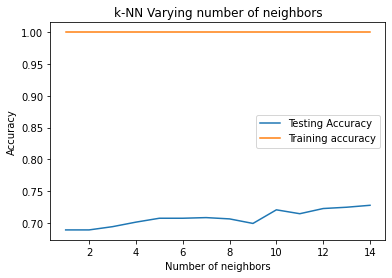

In [23]:
#checking the best number of neighbors
neighbors = np.arange(1,15)
neighbors
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=14,weights='distance')
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [25]:
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print("\nAccuracy Score: %.2f " % accuracy_score(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       227
           1       0.75      0.72      0.73       321
           2       0.70      0.75      0.72       432

    accuracy                           0.73       980
   macro avg       0.74      0.72      0.73       980
weighted avg       0.73      0.73      0.73       980

[[159  12  56]
 [  8 230  83]
 [ 43  65 324]]

Accuracy Score: 0.73 


## Neural Network

In [26]:
#more layers can lead to overfitting
mlpc=MLPClassifier(hidden_layer_sizes=(146,78,39),max_iter=1000,activation = 'relu',solver='adam',random_state=42,shuffle=True,learning_rate='adaptive')
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)

In [27]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))
print("\nAccuracy Score: %.2f " % accuracy_score(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       227
           1       0.73      0.66      0.69       321
           2       0.68      0.73      0.70       432

    accuracy                           0.70       980
   macro avg       0.70      0.70      0.70       980
weighted avg       0.70      0.70      0.70       980

[[159  13  55]
 [ 16 212  93]
 [ 53  65 314]]

Accuracy Score: 0.70 


In [28]:
wine.head(-10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.50,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.10,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.90,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.90,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4.9,0.47,0.17,1.9,0.035,60.0,148.0,0.98964,3.27,0.35,11.50,2
4884,6.5,0.33,0.38,8.3,0.048,68.0,174.0,0.99492,3.14,0.50,9.60,1
4885,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.55,2
4886,6.2,0.21,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,0


## Testing Manually

In [29]:
#xnew 1,2,0
Xnew = [[6.5,0.33,0.38,8.3,0.048,68.0,174.0,0.99492,3.14,0.50,9.60],[6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5],[6.2,0.21,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.15]]
Xnew = sc.fit_transform(Xnew)
ynew = mlpc.predict(Xnew)
ynew

array([1, 2, 0])